In [19]:
import sys
import os
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re

import src.io as sio
import src.qudi_fit_wrapper as qft
import src.helpers as shp
import src.fitting as sft

plt.style.use('seaborn')

In [3]:
DATA_FOLDER = "20220405_FR0612-F2-3C2"
DATA_FOLDERPATH, FIGURE_FOLDERPATH = sio.get_data_and_figure_paths(DATA_FOLDER)

src.io :: INFO :: qudiamond folderpath is \\kernix\qudiamond\Data\20220405_FR0612-F2-3C2\


In [7]:
t1 = sio.read_pulsed_measurement_dataclass(DATA_FOLDERPATH, measurement_str="t1")
T1 = sio.read_pulsed_measurement_dataclass(DATA_FOLDERPATH, measurement_str="T1")

\\kernix\qudiamond\Data\20220405_FR0612-F2-3C2\2022\04\20220419\ROIs: : 11it [00:00, 15.60it/s]             
\\kernix\qudiamond\Data\20220405_FR0612-F2-3C2\2022\04\20220419\ROIs: : 11it [00:00, 343.72it/s]       


In [12]:
t1.update(T1)

In [13]:
t1

OrderedDict([('20220419-1018-45',
              PulsedData(timestamp='2022-04-19 10:18:45', base_filename='20220419-1018-45_t1_3.5ms')),
             ('20220419-1207-35',
              PulsedData(timestamp='2022-04-19 12:07:35', base_filename='20220419-1207-35_T1_7ms')),
             ('20220419-1559-51',
              PulsedData(timestamp='2022-04-19 15:59:51', base_filename='20220419-1559-51_T1_18ms'))])

20220419-1018-45
20220419-1207-35
20220419-1559-51


In [52]:
result.params["lifetime"].stderr

3322736.381779715

src.fit_logic :: INFO :: Methods were included to FitLogic, but only if naming is right: check the doxygen documentation if you added a new method and it does not show.
src.fit_logic :: INFO :: Methods were included to FitLogic, but only if naming is right: check the doxygen documentation if you added a new method and it does not show.
src.fit_logic :: INFO :: Methods were included to FitLogic, but only if naming is right: check the doxygen documentation if you added a new method and it does not show.


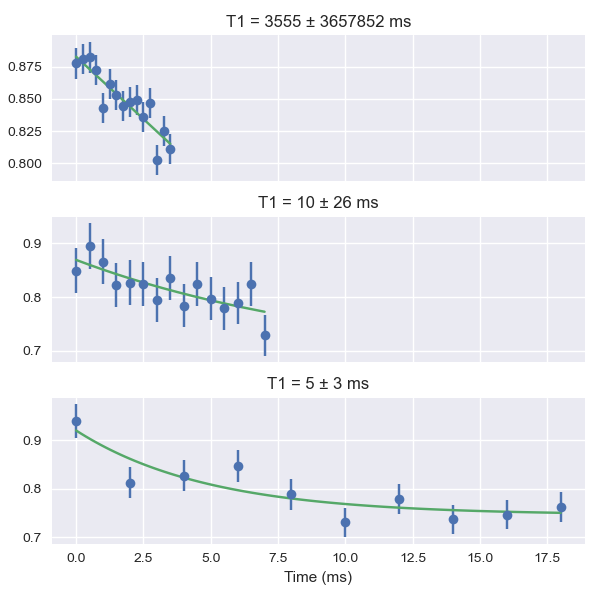

In [90]:
%matplotlib widget
fig, ax = plt.subplots(nrows=len(t1), sharex=True, figsize=(6, 6))

for idx, t1_meas in enumerate(t1.values()):
    df_data =  t1_meas.pulsed_measurement.get_data()
    x = df_data["Controlled variable(s)"] * 1e3

    y, yerr = qft.analyse_mean_norm(t1_meas.laser_pulses.get_data(), signal_start=170e-9, signal_end=250e-9, norm_start=2000e-9, norm_end=3000e-9)
    # y, yerr = qft.analyse_mean(t1_meas.laser_pulses.get_data(), signal_start=170e-9, signal_end=250e-9)
    # y, yerr = qft.analyse_mean_reference(t1_meas.laser_pulses.get_data(), signal_start=170e-9, signal_end=250e-9, norm_start=2000e-9, norm_end=3000e-9)
    # y /= np.max(y)
        
    ax[idx].errorbar(x, y, yerr=yerr, fmt="o")
    
    fit_x, fit_y, result = qft.perform_fit(x, y, "decayexponential")
    ax[idx].set_title(f"T1 = {round(result.params['lifetime'].value)} ± {round(result.params['lifetime'].stderr)} ms")
    
    ax[idx].plot(fit_x, fit_y)
    
    
ax[-1].set_xlabel("Time (ms)")
fig.tight_layout()

# sio.save_figures("t1_comparison", FIGURE_FOLDERPATH)